In [1]:
import torch

import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import cv2
from tqdm import tqdm

In [2]:
raw_data_dir_aptos_train = '/home/chong.tian/hc701/preprocessed/aptos/train'
new_data_dir_aptos_train = '/home/chong.tian/hc701/preprocessed/aptos/train'

In [3]:
for i in os.listdir(raw_data_dir_aptos_train):
    data = np.load(os.path.join(raw_data_dir_aptos_train, i), allow_pickle=True).item()
    image = data['image']
    label = data['label']
    save_path = os.path.join(new_data_dir_aptos_train, 'class'+str(label))
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    cv2.imwrite(os.path.join(save_path, i[:-4]+'.png'), image)

In [4]:
raw_data_dir_aptos_val = '/home/chong.tian/hc701/preprocessed/aptos/val'
new_data_dir_aptos_val = '/home/chong.tian/hc701/Pre_train_format/aptos/val'

In [5]:
for i in os.listdir(raw_data_dir_aptos_val):
    data = np.load(os.path.join(raw_data_dir_aptos_val, i), allow_pickle=True).item()
    image = data['image']
    label = data['label']+1
    save_path = os.path.join(new_data_dir_aptos_val, 'class'+str(label))
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    cv2.imwrite(os.path.join(save_path, i[:-4]+'.png'), image)

In [32]:
import cv2
raw_data_dir_eyepacs_train = '/home/chong.tian/hc701/preprocessed/aptos/test'
new_data_dir_eyepacs_train = '/home/chong.tian/hc701/preprocessed/aptos/test'

In [33]:
for i in os.listdir(raw_data_dir_eyepacs_train):
    data = np.load(os.path.join(raw_data_dir_eyepacs_train, i), allow_pickle=True).item()
    image = data['image']
    label = data['label']
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data['image'] = image
    np.save(os.path.join(new_data_dir_eyepacs_train, i), data)

In [30]:
raw_data_dir_eyepacs_val = '/home/chong.tian/hc701/preprocessed/aptos/val'
new_data_dir_eyepacs_val = '/home/chong.tian/hc701/preprocessed/aptos/val'

In [31]:
for i in os.listdir(raw_data_dir_eyepacs_val):
    data = np.load(os.path.join(raw_data_dir_eyepacs_val, i), allow_pickle=True).item()
    image = data['image']
    label = data['label']
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data['image'] = image
    np.save(os.path.join(new_data_dir_eyepacs_val, i), data)

In [44]:
test = np.load('/home/chong.tian/hc701/preprocessed/messidor2/train/20051020_44901_0100_PP.npy', allow_pickle=True).item()

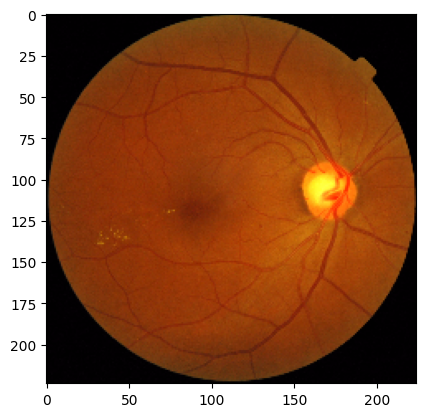

In [45]:
plt.imshow(test['image'])

In [1]:
import sys
sys.path.append('/home/chong.tian/hc701/HC701-PROJECT')

import os
import numpy as np

import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import ConcatDataset

from hc701fed.dataset.messidor import MESSIDOR
from hc701fed.dataset.EyePACS_and_APTOS import Eye_APTOS

In [2]:
PATH_DATA = '/home/chong.tian/hc701'
from torchvision.transforms import InterpolationMode
interpolation = InterpolationMode.BICUBIC

In [3]:


MESSIDOR_data_dir_options = {
    'messidor2': os.path.join(PATH_DATA, 'preprocessed/messidor2'),
    'messidor_pairs' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_pairs'),
    'messidor_Etienne' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_Etienne'),
    'messidor_Brest-without_dilation' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_Brest-without_dilation')
}

Eye_APTOS_data_dir_options = {
    'EyePACS': os.path.join(PATH_DATA, 'preprocessed/eyepacs'),
    'APTOS': os.path.join(PATH_DATA, 'preprocessed/aptos'),
}

train_transforms = transforms.Compose([
    # transfer to PIL image
    transforms.Lambda(lambda x: Image.fromarray(x)),
    transforms.RandomResizedCrop(224, scale=(0.67, 1.0), interpolation=interpolation),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.3778, 0.2800, 0.2310], std=[0.2892, 0.1946, 0.2006]),
])

test_transforms = transforms.Compose([
    transforms.Lambda(lambda x: Image.fromarray(x)),
    transforms.Resize(224, interpolation=interpolation),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.3778, 0.2800, 0.2310], std=[0.2892, 0.1946, 0.2006]),
])

In [4]:
MESSIDOR_2_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor2'], mode='train', transform_=train_transforms)
MESSIDOR_pairs_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_pairs'], mode='train', transform_=train_transforms)
MESSIDOR_Etienne_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Etienne'], mode='train', transform_=train_transforms)
MESSIDOR_Brest_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Brest-without_dilation'], mode='train', transform_=train_transforms)

MESSIDOR_2_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor2'], mode='val', transform_=test_transforms)
MESSIDOR_pairs_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_pairs'], mode='val', transform_=test_transforms)
MESSIDOR_Etienne_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Etienne'], mode='val', transform_=test_transforms)
MESSIDOR_Brest_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Brest-without_dilation'], mode='val', transform_=test_transforms)

APTOS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['APTOS'], mode='train', transform_=train_transforms)
EyePACS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['EyePACS'], mode='train', transform_=train_transforms)

In [7]:
val_loader = torch.utils.data.DataLoader(MESSIDOR_pairs_Val, batch_size=1, shuffle=False, num_workers=0)
for i,(X,y) in enumerate(val_loader):
    print(X.shape)
    print(y)
    break

torch.Size([1, 3, 224, 224])
tensor([0])


In [5]:
test = np.load('/home/chong.tian/hc701/preprocessed/aptos/train/1ae8c165fd53.npy', allow_pickle=True).item()

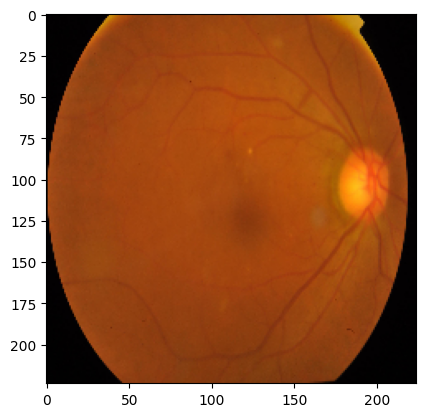

In [6]:
plt.imshow(test['image'])

In [6]:
img = test['image']
from PIL import Image
img_test = Image.fromarray(img)

In [7]:
img_2_test = transforms.Lambda(lambda x: Image.fromarray(x))(img)

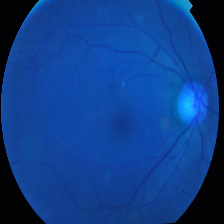

In [8]:
img_2_test

In [9]:
img2 = transforms.RandomResizedCrop(224, scale=(0.67, 1.0), interpolation=interpolation)(img_test)

In [10]:
img3=transforms.RandomHorizontalFlip()(img2)


In [32]:
img4 = transforms.ToTensor()(img3)

In [34]:
img5 = transforms.Normalize(mean=[0.3778, 0.2800, 0.2310], std=[0.2892, 0.1946, 0.2006])(img4)

In [5]:
center_all_dataset = ConcatDataset([MESSIDOR_2_train, MESSIDOR_pairs_train, MESSIDOR_Etienne_train, MESSIDOR_Brest_train, APTOS_train, EyePACS_train])

In [6]:
center_all_dataset_loader = torch.utils.data.DataLoader(center_all_dataset, batch_size=128, shuffle=False, num_workers=0)

In [7]:
# check the mean and std of the dataset
from tqdm import tqdm
for i,(X,y) in enumerate(center_all_dataset_loader):
    print(X.shape)
    break
#     if i == 0:
#         X_all = X
#         y_all = y
#     else:
#         X_all = torch.cat((X_all, X), 0)
#         y_all = torch.cat((y_all, y), 0)
#     if i ==2:
#         break

# mean = torch.mean(X_all, dim=(0,2,3))
# std = torch.std(X_all, dim=(0,2,3))

# print(mean)
# print(std)

torch.Size([128, 3, 224, 224])


In [18]:
X_all[1,:,:,:].max()

tensor(1.)

In [7]:
save_path_meta = '/home/chong.tian/hc701/Pre_train_format/messidor2/train'
for i,(X,y) in enumerate(MESSIDOR_2_train_loader):
    X = X.squeeze().detach().cpu()
    X = transforms.ToPILImage()(X)
    label = int(y.tolist()[0])+1
    save_path = os.path.join(save_path_meta, 'class'+str(label))
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    X.save(os.path.join(save_path, f"messidor_2_train_image_{i}.png"), format="PNG")

save_path_meta = '/home/chong.tian/hc701/Pre_train_format/messidor2/val'
for i,(X,y) in enumerate(MESSIDOR_2_Val_loader):
    X = X.squeeze().detach().cpu()
    X = transforms.ToPILImage()(X)
    label = int(y.tolist()[0])+1
    save_path = os.path.join(save_path_meta, 'class'+str(label))
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    X.save(os.path.join(save_path, f"messidor_2_val_image_{i}.png"), format="PNG")

In [ ]:
save_path_meta = '/home/chong.tian/hc701/Pre_train_format/messidor/train'
for i,(X,y) in enumerate(MESSIDOR_train_loader):
    X = X.squeeze().detach().cpu()
    X = transforms.ToPILImage()(X)
    label = int(y.tolist()[0])+1
    save_path = os.path.join(save_path_meta, 'class'+str(label))
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    X.save(os.path.join(save_path, f"messidor_train_image_{i}.png"), format="PNG")

save_path_meta = '/home/chong.tian/hc701/Pre_train_format/messidor/val'
for i,(X,y) in enumerate(MESSIDOR_Val_loader):
    X = X.squeeze().detach().cpu()
    X = transforms.ToPILImage()(X)
    label = int(y.tolist()[0])+1
    save_path = os.path.join(save_path_meta, 'class'+str(label))
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    X.save(os.path.join(save_path, f"messidor_val_image_{i}.png"), format="PNG")

In [8]:
data_dir = {
    '1': '/home/chong.tian/hc701/preprocessed/aptos/test',
    '2': '/home/chong.tian/hc701/preprocessed/aptos/train',
    '3': '/home/chong.tian/hc701/preprocessed/aptos/val',
    '4': '/home/chong.tian/hc701/preprocessed/eyepacs/test',
    '5': '/home/chong.tian/hc701/preprocessed/eyepacs/train',
    '6': '/home/chong.tian/hc701/preprocessed/eyepacs/val',
    '7': '/home/chong.tian/hc701/preprocessed/messidor/messidor_Brest-without_dilation/test',
    '8': '/home/chong.tian/hc701/preprocessed/messidor/messidor_Brest-without_dilation/train',
    '9': '/home/chong.tian/hc701/preprocessed/messidor/messidor_Etienne/test',
    '12': '/home/chong.tian/hc701/preprocessed/messidor/messidor_Etienne/train',
    '13': '/home/chong.tian/hc701/preprocessed/messidor/messidor_pairs/test',
    '14': '/home/chong.tian/hc701/preprocessed/messidor/messidor_pairs/train',

    '10': '/home/chong.tian/hc701/preprocessed/messidor2/test',
    '11': '/home/chong.tian/hc701/preprocessed/messidor2/train',
}

In [13]:
savepath = '/home/chong.tian/hc701/Pre_train_format'
from tqdm import tqdm
for i in data_dir.values():
    for k in tqdm(os.listdir(i)):
        data = np.load(os.path.join(i, k), allow_pickle=True).item()
        X = data['image']
        plt.imsave(os.path.join(savepath, k[:-4]+'.png'), X)

 80%|███████▉  | 7012/8781 [03:39<00:52, 33.61it/s]